# Noise Removal From Images (Project)

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the dataset.

## First we will import the data and look into shape of the data,after that we will deliberately add some noise to the data and further proceed with cleaning the same.

In [1]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, cache=True)

mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

To view the image of a single digit,all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

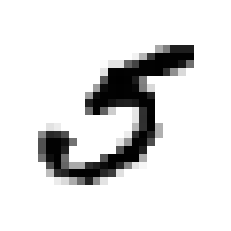

In [6]:
some_digit = X[36000]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

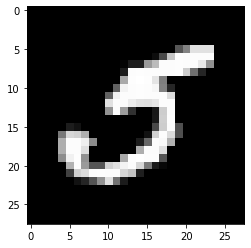

In [7]:
plt.imshow(255-some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

In [8]:
some_digit_image.shape

(28, 28)

In [9]:
X[36000].shape

(784,)

In [10]:
y[36000]

5

In [11]:
y.shape

(70000,)

We need to split the data into test and train data. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Also we need to shuffle our training data so that it ensures that we don't miss out any digit in a cross validation fold.

In [13]:
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Since KNN take a lot of time, we are trimming it here

In [14]:
X_train = X_train[:30000]
y_train = y_train[:30000]

X_test = X_test[:5000]
y_test = y_test[:5000]

In [15]:
import numpy.random as rnd

noise_train = rnd.randint(0, 100, (len(X_train), 784)) 
X_train_mod =X_train + noise_train 
noise_test = rnd.randint(0, 100, (len(X_test),784)) 
X_test_mod = X_test + noise_test 
y_train_mod = X_train
y_test_mod = X_test

Let's view the noisy image

In [16]:
def plot_digit(array):
    array_image = array.reshape(28, 28)
    plt.imshow(array_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

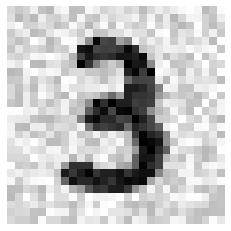

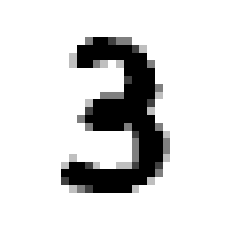

In [17]:
plot_digit(X_test_mod[4000])

plot_digit(y_test_mod[4000])

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[4000]])

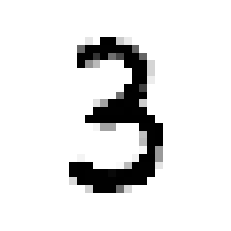

In [19]:
plot_digit(clean_digit)

In [20]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [21]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [22]:
sgd_clf=SGDClassifier(random_state=42,max_iter=200)
sgd_clf.fit(X_train,y_train_5)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=200, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
sgd_clf.predict([X[36000]])

array([ True])

CROSS VALIDATION TO CHECK ACCURACY OF OUR SGDCLASSIFIER MODEL

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=10,scoring="accuracy")

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.958     , 0.961     , 0.96533333, 0.96433333, 0.94633333,
       0.96033333, 0.95833333, 0.96433333, 0.96      , 0.959     ])

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train,
y_train_5, cv=3)

Confusion MATRIX CALCULATION

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[26956,   291],
       [  999,  1754]])

In [27]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8577017114914426
0.6371231383944788


TO MAIN THE BALANCE BETWEEN THE PRECISION AND RECALL WE USE F1_SCORE

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7311379741558983

DESCISION FUNCTION GIVES US THE CONFIDENCE SCORE OF THAT PREDICTION

In [30]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([3731.15961398])

INCREASING THRESHOLD DECREASES RECALL AND INCREASES PRECISION

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

PRECISION-RECALL CURVE

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train,
y_train_5, cv=3,
method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds =precision_recall_curve(y_train_5, y_scores)

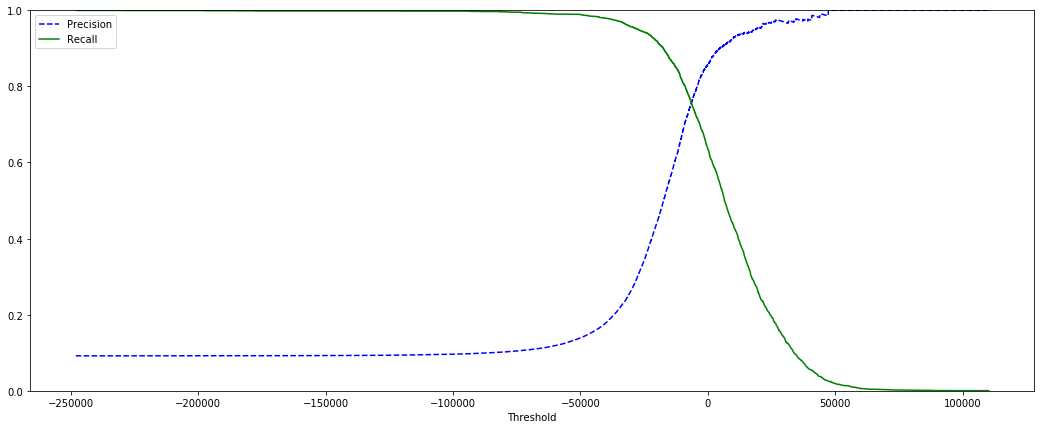

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls,thresholds):
    plt.figure(figsize=(18,7))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
plt.show()

PRECISION VS RECALL CURVE

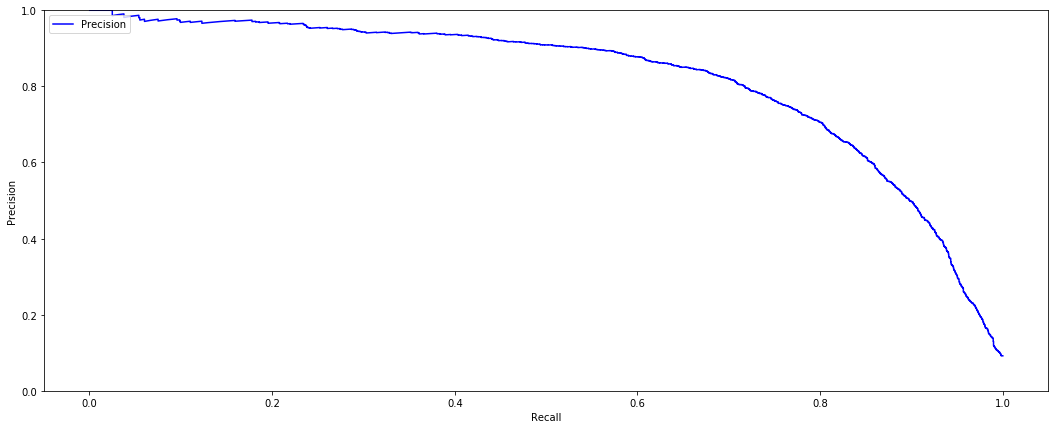

In [36]:
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(18,7))
    plt.plot(recalls[:-1], precisions[:-1], "b-", label="Precision")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_vs_recall(precisions, recalls)
plt.show()

ROC CURVE (TRUE POSITIVE RATE VS FALSE POSITIVE RATE)
Used to compare the different models.
If the Area covered is larger then it is a good classifier.

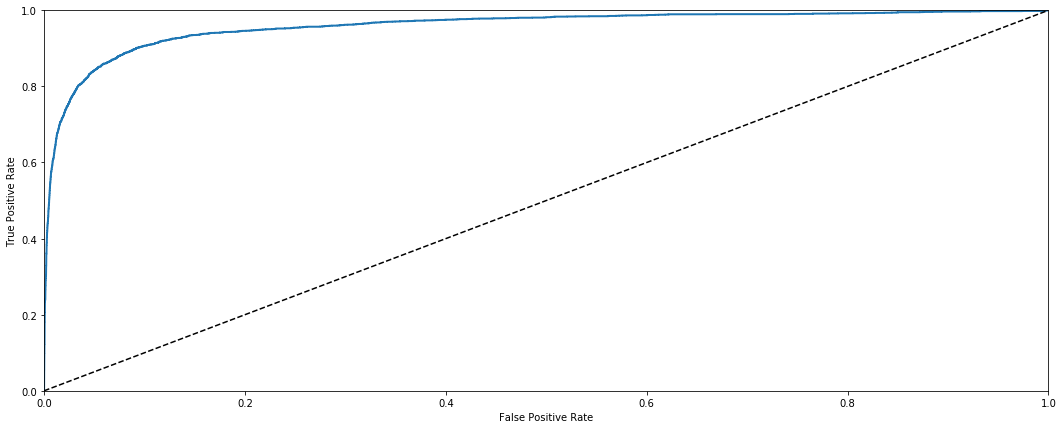

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(18,7))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()


A perfect classifier shall have a ROC Area Under the Curve (AUC) equal
to 1 whereas a purely random classifier shall have ROC AUC = 0.5.

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9582644095449958